In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
path = 'velocity_results/alpha04_2D_'
Ux_file = np.load(path + 'Ux.npy').T
Ur_file = np.load(path + 'Uy.npy').T

x_2D = np.load(path + 'x.npy')
r_2D = np.load(path + 'y.npy')

# Ux_file = Ux_file[:,r_2D>0]
# Ur_file = Ur_file[:,r_2D>0]
# r_2D = r_2D[r_2D>0]



In [8]:
theta = np.linspace(0, 2*np.pi, 361)
X_polar, R_polar, Theta_polar = np.meshgrid(x_2D, r_2D, theta, indexing='ij')

Y_cartesian = R_polar * np.cos(Theta_polar)
Z_cartesian = R_polar * np.sin(Theta_polar)

# Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], (300, 150, 100))
# Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.cos(theta)
# Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.sin(theta)

Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], (300, 301, 361))
Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 301, 361)) * np.cos(theta)
Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 301, 361)) * np.sin(theta)

print(X_polar[132,35,57], Y_cartesian[132,35,57], Z_cartesian[132,35,57], Ux_cartesian[132,35,57], Uy_cartesian[132,35,57], Uz_cartesian[132,35,57])


-0.234113712374582 -0.8335353177828972 -1.2835318319559381 -1.9756027577747095 0.274055885031479 0.42200905548717194


In [9]:
print(Ux_file[132, 35], Ur_file[132, 35]*np.cos(theta[57]), Ur_file[132, 35]*np.sin(theta[57]))

-1.9756027577747095 0.274055885031479 0.42200905548717194


Text(0.5, 0.5, 'Z')

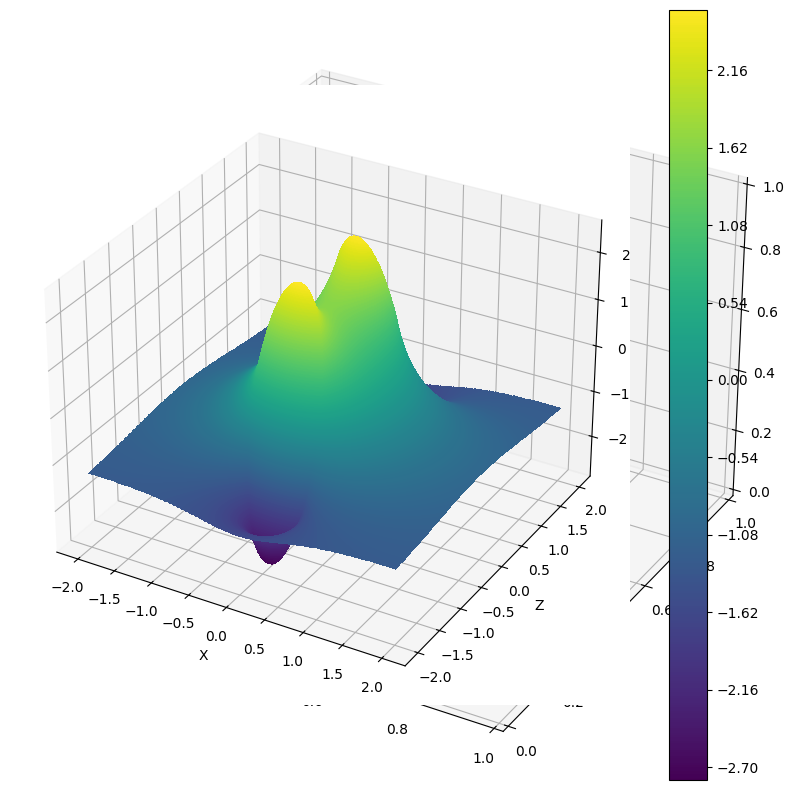

In [15]:
k = 180
ux_test = Ux_cartesian[:, :, k]
uy_test = Uy_cartesian[:, :, k]
uz_test = Uz_cartesian[:, :, k]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

c = ax.contourf3D(X_polar[:, :, k], Y_cartesian[:, :, k], ux_test, 500, cmap='viridis')
fig.colorbar(c)
ax.set_xlabel('X')
ax.set_ylabel('Z')

In [19]:
np.max(Y_cartesian[:, :, k])

2.0